In [1]:
!sqlite3 -version

3.33.0 2020-08-14 13:23:32 fca8dc8b578f215a969cd899336378966156154710873e68b3d9ac5881b0alt2


In [2]:
# Code cell 2
# Create the InternetSpeed database
!sqlite3 ./InternetSpeed.db ".databases"

main: /media/franck-malko/Data/TUSUR/Master TUSUR/Semestre 2/Анализ больших данных/Лабораторные работы/5- Результат выполнения ЛР_1/Результат выполнения ЛР_3/./InternetSpeed.db


In [3]:
# Code cell 3
# Installing csvkit
!pip install csvkit

Processing /home/franck-malko/.cache/pip/wheels/3c/ae/39/f7a6ac5302a582f6453a763e8d7d936292be5d0c132742c2d3/csvkit-1.0.5-py3-none-any.whl


In [4]:
# Code cell 4
# Removing database if already existing
!test -e InternetSpeed.db && rm InternetSpeed.db
# Importing the LA_wifi_speed_UK.csv file into a sql database file InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert ./LA_wifi_speed_UK.csv
# This will take a while

In [9]:
# Code cell 6
# What is the name of the database you want to connect to?
# conn = sqlite3.connect(??)
# SOLUTION :
import sqlite3 as db
# conn = sqlite3.connect('InternetSpeed.db')
conn = db.connect('InternetSpeed.db')
cur = conn.cursor()

In [11]:
# Code cell 7
# complete the query with the field you want to select, the table you want to select the field from,
# and the field zou want your results to be ordered by
# query = 'SELECT ? FROM ? ORDER BY ? LIMIT ?;'

# SOLUTION
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'

cur.execute(query)

In [12]:
# Code cell 8
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [13]:
# Code cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10;'
cur.execute(query)

for row in cur:
    print(row)

('2016-11-30 07:00:00.000000',)
('2016-11-24 16:00:00.000000',)
('2016-12-13 07:30:00.000000',)
('2016-12-04 15:30:00.000000',)
('2016-12-06 23:30:00.000000',)
('2016-12-08 18:30:00.000000',)
('2016-12-11 10:00:00.000000',)
('2016-12-02 00:00:00.000000',)
('2016-12-12 08:30:00.000000',)
('2016-12-08 09:00:00.000000',)


In [14]:
# Code cell 10
# We need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1;'
cur.execute(query)

In [15]:
# Code cell 11
# Visualizing the first 10 rows of the field description
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [16]:
# Code cell 12
# loop over the header and then in a list
columns = [member[0] for member in cur.description]

# Ignore index column
columns = columns[1:]

In [17]:
# Code cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
# columns = ??

#SOLUTION
columns = [c.replace('_u', '') for c in columns]

# this operation is to remove duplicates
columns = list(set(columns))

In [18]:
# Code cell 14
# Visualize the first 10 areas
columns[:10]

['E07000200',
 'E06000015',
 'E07000180',
 'E07000197',
 'E06000024',
 'E07000101',
 'E07000051',
 'E07000201',
 'E07000141',
 'E08000009']

In [19]:
# Code cell 15
area = columns[0]
print(area)

E07000200


In [20]:
# Code cell 16
suffix= {'_p':'ping', '_d':'download', '_u':'upload'}
# We have suffixes as the keys of the dictionary 
print(suffix.keys())

# We have the complete names as the values of the dictionary
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000200')

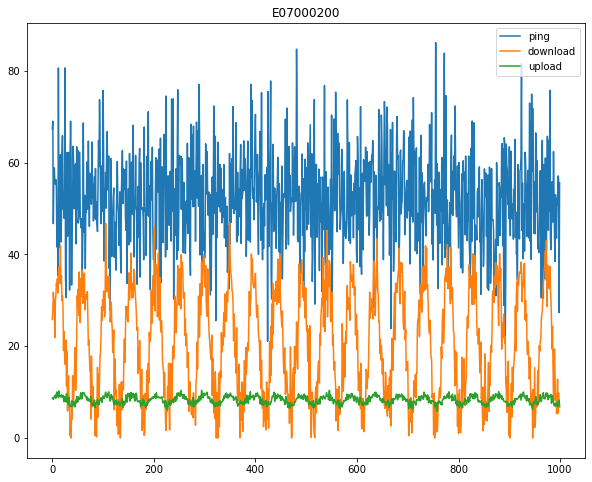

In [22]:
# Code cell 17
import matplotlib
import matplotlib.pyplot as plt

area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    # query = ??
    # SOLUTION:
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [24]:
# Code cell 18
import pandas as pd

# new_columns = ?
# df = pd.DataFrame(columns = ?)

# SOLUTION
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [25]:
# Code cell 19
# this will take a while...
for i in range(len(columns)-1): # EDL : replace xrange with range
    tmp_list = []
    tmp_list.append(columns[1])
    for s in suffix.keys():
        # query = ??
        # SOLUTION:
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[1], s)
        
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    # Append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# Visualize the head of the dataframe here
# SOLUTION:
df.head()

,Area,Average_p,Average_d,Average_u
0,E06000015,54.934478,22.387067,8.957834
1,E06000015,54.934478,22.387067,8.957834
2,E06000015,54.934478,22.387067,8.957834
3,E06000015,54.934478,22.387067,8.957834
4,E06000015,54.934478,22.387067,8.957834


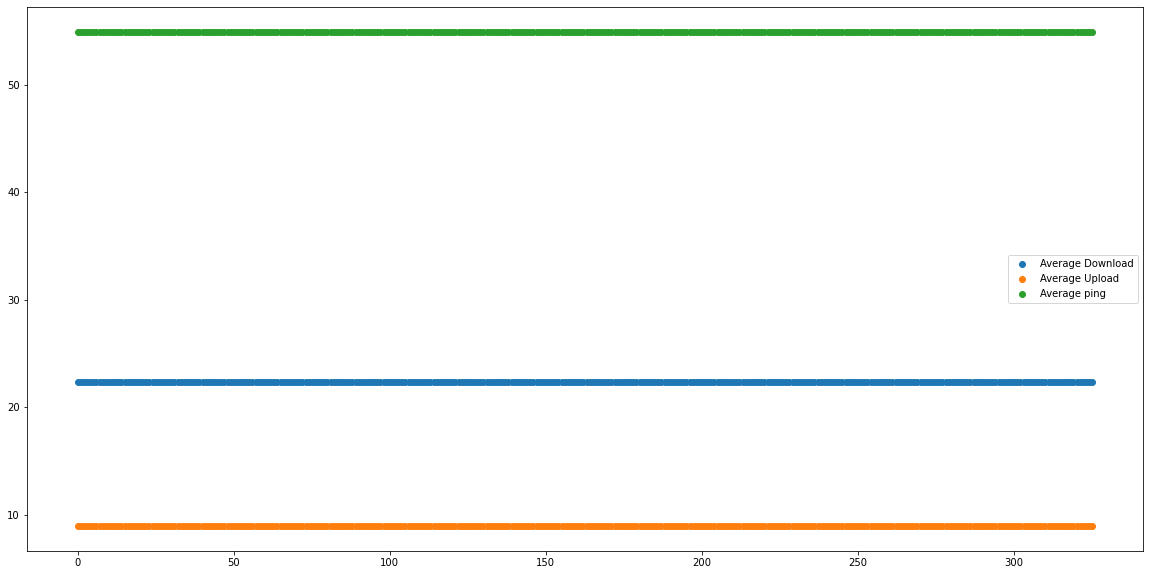

In [27]:
# Code cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average ping'])

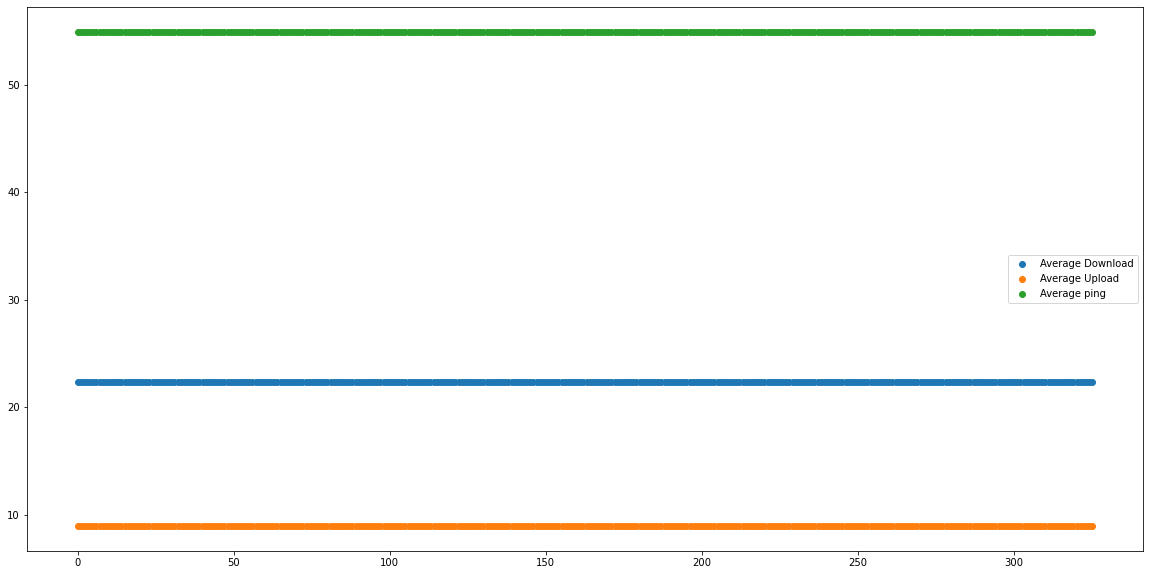

In [28]:
# Code cell 20-
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average ping'])

In [32]:
# Code cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# What is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
# df.to_sql(?,?)

# SOLUTION:
df.to_sql('average_speed', conn)

In [33]:
# Code cell 22
# Just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355)
(1, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355)


In [34]:
# Code cell 23
# First close the database file, otherwise the external data from the csv file
conn.close()

In [35]:
# Code cell 24
# Use the external database csvsql command to add to the DB file data from the csv file
# !csvsql --db sqlite:///...
!csvsql --db sqlite:///InternetSpeed.db --insert ./LA_population.csv

In [36]:
# Code cell 25
# Reopen the DB file 
# conn = sqlite3.connect(...)
conn = db.connect('InternetSpeed.db')
cur = conn.cursor()

In [37]:
# Code cell 26
# query = ?
# SOLUTION
query = 'SELECT * FROM LA_population LIMIT 10'

# cur.execute(?)
# SOLUTION:
cur.execute(query)

for row in cur:
    # print the first fetched record
    # SOLUTION:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [38]:
# Code cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area;'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break;
    # print ?
    
    # SOLUTION:
    print(row)
    
    k+=1

(0, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(1, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(2, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(3, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(4, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(5, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(6, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(7, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(8, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752.0)
(9, 'E06000015', 54.93447752674741, 22.38706665857376, 